# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

** Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

** R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [12]:
import numpy as np

def calc_slope(xs,ys):
    return (xs.mean() * ys.mean() - (xs*ys).mean()) / (xs.mean()**2 - (xs**2).mean())

def best_fit(xs,ys):
    m = calc_slope(xs, ys)
    c = ys.mean() - m * xs.mean()
    return m, c


def sq_err(y_a, y_b):
    """
    input
    y_a : true y values
    y_b : regression line

    
    return
    squared error between regression and true line (ss_tot)
    """
    return sum((y_a-y_b)**2)

def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    return 1 - sq_err(y_real, y_predicted) / sum((y_real-y_real.mean())**2)

# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [24]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

def linregdiag(x, y, rounding=2):
    m, c = best_fit(x,y)
    y_predicted = m*x + c
    r2 = r_squared(y, y_predicted)
    print('Basic Regression Diagnostics')
    print('-'*28)
    print('Slope: {0:.{1}f}'.format(m, rounding))
    print('Y-Intercept: {0:.{1}f}'.format(c, rounding))
    print('R-Squared: {0:.{1}f}'.format(r2, rounding))
    print('-'*28)
    print('Model: Y = {0:.{2}f} * X + {1:.{2}f}'.format(m, c, rounding))
    return m, c, r2
    
m, c, r2 = linregdiag(X, Y)


Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [25]:
# Make prediction using given value and visualize on the scatter plot
import matplotlib.pyplot as plt
%matplotlib inline

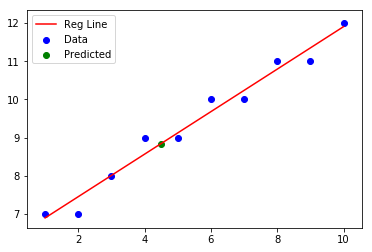

In [28]:
plt.plot(X, X*m+c, label='Reg Line', color='red')
plt.scatter(X, Y, label='Data', color='blue')
plt.scatter(4.5, 4.5*m+c, label='Predicted', color='green')
plt.legend();

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [29]:
import pandas as pd

In [31]:
data = pd.read_csv('heightWeight.csv')
data.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [32]:
X = data.height
Y = data.weight

m, c, r2 = linregdiag(X, Y)

Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96
----------------------------
Model: Y = 5.54 * X + -204.48


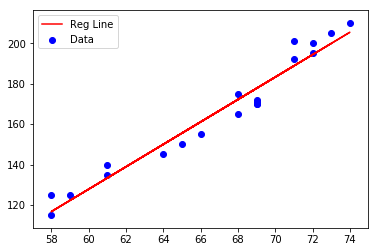

In [33]:
plt.plot(X, X*m+c, label='Reg Line', color='red')
plt.scatter(X, Y, label='Data', color='blue')
plt.legend();